# Real Data

In [1]:
import glob
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

path = '/Users/olivia.rourke/Desktop/Berkley/20240516_MEYDT011/plots-sup/4gRNA'

files = glob.glob(f"{path}/*4gRNAs*DF.csv")

file_names = [os.path.basename(f) for f in files]

In [2]:
def plot_mutation_probabilities(file):
    df = pd.read_csv(file)
    ref = df.iloc[0]
    end = len(df.columns) - 4 # last 4 entries are ID
    ref_values = ref.iloc[1:end].values 
    sequence = df.iloc[:, 1:end].values

    grna_slices = [
        (53, 73),
        (104, 124),
        (119, 142),
        (149, 170)
    ]
    
    mutable_positions = []
    mutation_types = []

    for i, (start, end) in enumerate(grna_slices):
        for pos in range(start, end):
            if (i < 2 and ref_values[pos] == 2):  # Cs in gRNA slices 1 and 2
                mutable_positions.append(pos)
                mutation_types.append('C to T')
            elif (i >= 2 and ref_values[pos] == 4):  # Gs in gRNA slices 3 and 4
                mutable_positions.append(pos)
                mutation_types.append('G to A')

    print(f"Number of mutable bases: {len(mutable_positions)}")  # Should be 35

    mutation_counts_per_read = []

    # only counts mutations of type C to T or G to A in mutable positions 
    for read in sequence:
        mutation_count = 0
        for i, pos in enumerate(mutable_positions):
            if (mutation_types[i] == 'C to T' and read[pos] == 3) or (mutation_types[i] == 'G to A' and read[pos] == 1):
                mutation_count += 1
        mutation_counts_per_read.append(mutation_count)

    total_reads = len(mutation_counts_per_read)

    plt.figure(figsize=(10, 6))
    counts, bins, patches = plt.hist(mutation_counts_per_read, bins=range(37), color='blue', alpha=0.7, edgecolor='black', align='left')
    
    # Normalize counts to percentages
    counts = counts / total_reads * 100
    plt.close()  # Close the current figure to prevent duplicate plots

    plt.figure(figsize=(10, 6))
    plt.bar(bins[:-1], counts, width=1, color='blue', alpha=0.7, edgecolor='black', align='center')
    plt.xlabel('Number of Mutated Bases per Read')
    plt.ylabel('Percentage of Reads')
    plt.figtext(0.5, -0.01, f'File: {os.path.basename(file)}', ha='center', fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
    plt.title('Histogram of Number of Mutated Bases per Read')
    plt.xticks(range(0, 36))
    plt.tight_layout()
    plt.show()
    
    histogram, _ = np.histogram(mutation_counts_per_read, bins=range(37))
    percentage_histogram = histogram / total_reads * 100
    
    return percentage_histogram


Number of mutable bases: 35


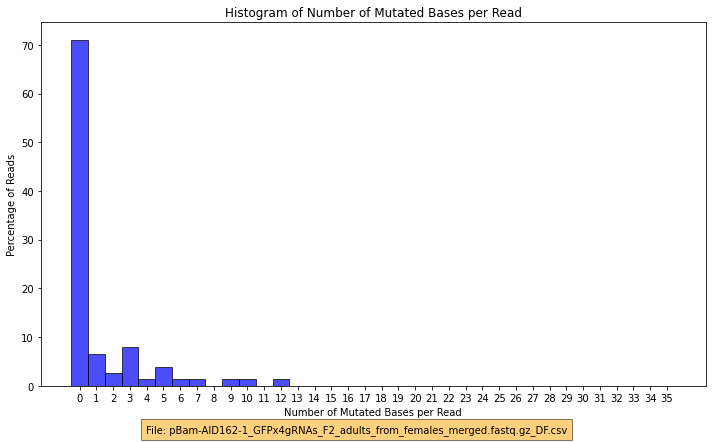

Number of mutable bases: 35


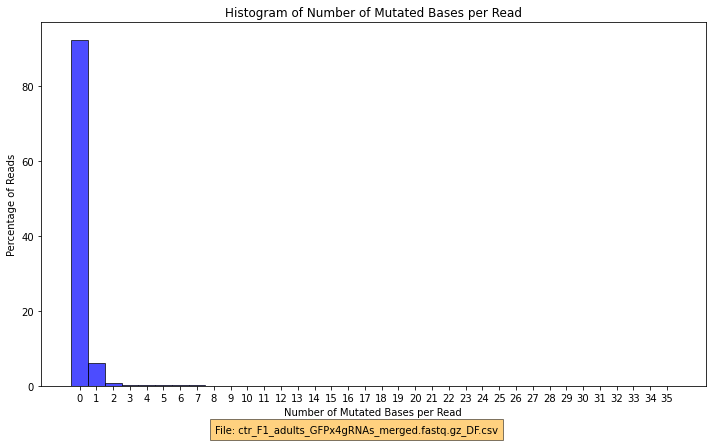

Number of mutable bases: 35


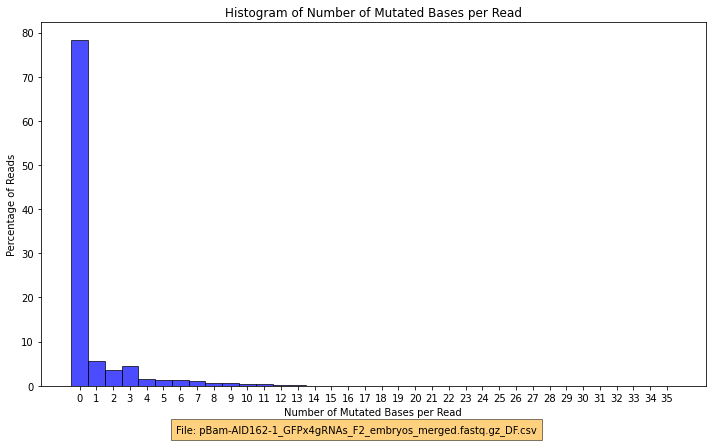

Number of mutable bases: 35


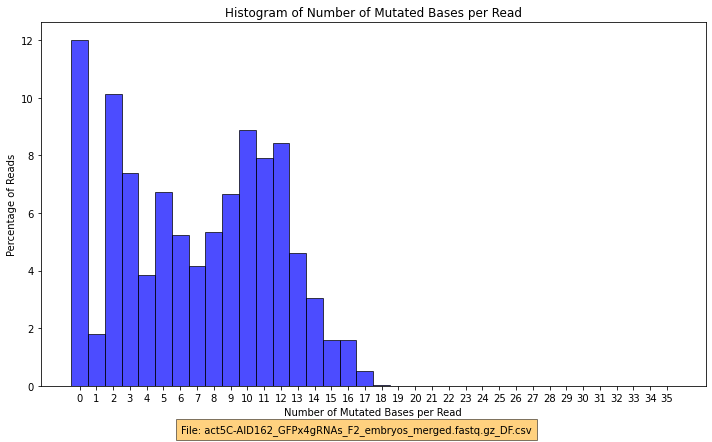

Number of mutable bases: 35


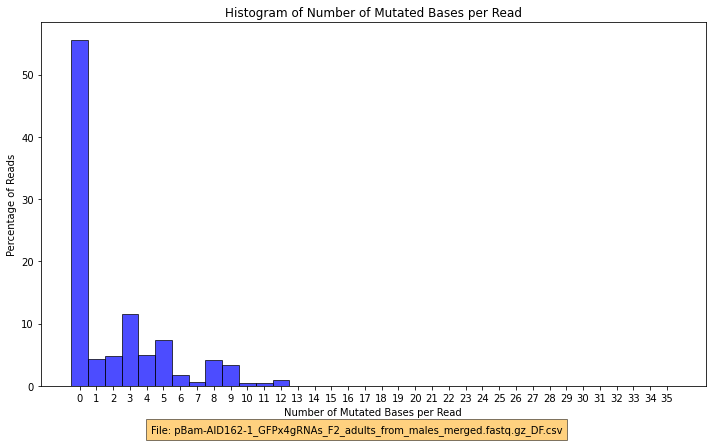

Number of mutable bases: 35


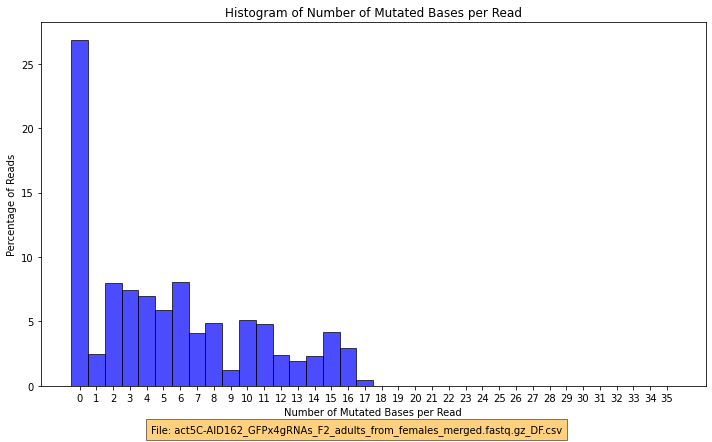

Number of mutable bases: 35


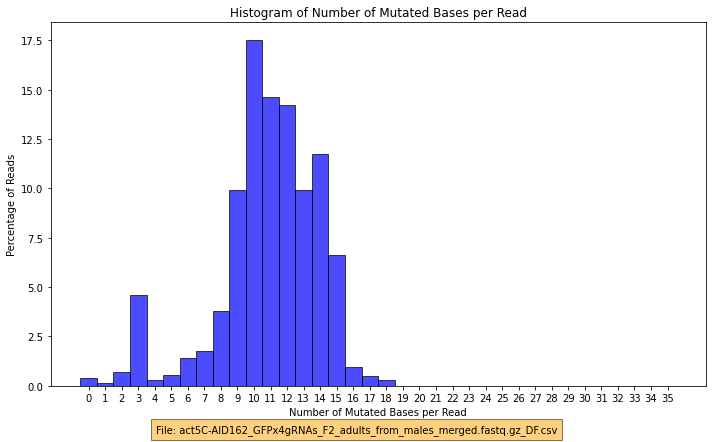

                                           File Name          0         1  \
0  pBam-AID162-1_GFPx4gRNAs_F2_adults_from_female...  71.052632  6.578947   
1    ctr_F1_adults_GFPx4gRNAs_merged.fastq.gz_DF.csv  92.306613  5.964654   
2  pBam-AID162-1_GFPx4gRNAs_F2_embryos_merged.fas...  78.401526  5.585322   
3  act5C-AID162_GFPx4gRNAs_F2_embryos_merged.fast...  12.021761  1.788508   
4  pBam-AID162-1_GFPx4gRNAs_F2_adults_from_males_...  55.598105  4.313212   
5  act5C-AID162_GFPx4gRNAs_F2_adults_from_females...  26.881027  2.438667   
6  act5C-AID162_GFPx4gRNAs_F2_adults_from_males_m...   0.400637  0.118137   

           2          3         4         5         6         7         8  \
0   2.631579   7.894737  1.315789  3.947368  1.315789  1.315789       0.0   
1   0.725857    0.32611  0.231433  0.126236  0.115716  0.084157  0.042079   
2   3.567949   4.574606   1.62364  1.278617  1.290794  1.116253  0.653515   
3  10.123027   7.406486  3.861471  6.741573  5.251742  4.170815  5.358413  

In [3]:
num_files = len(files)
num_bins = 36

# Initialize the DataFrame with an additional column for file names and integer indices
columns = ['File Name'] + list(range(num_bins))
df_histograms_subset = pd.DataFrame(columns=columns, index=range(num_files))

# Populate the DataFrame with percentage values for the 6 files
for idx, file in enumerate(files):
    percentages = plot_mutation_probabilities(file)
    df_histograms_subset.loc[idx, 'File Name'] = os.path.basename(file)
    df_histograms_subset.loc[idx, 0:num_bins-1] = percentages

print(df_histograms_subset)


# Simulated Data

In [4]:
#path = '/Users/olivia.rourke/Desktop/Berkley/files 10k cells'
path = '/Users/olivia.rourke/Desktop/Berkley/simulation output new'

files = [f for f in os.listdir(path) if f.endswith('.txt') and 'biased' in f] # biased only
# files = [f for f in os.listdir(path) if f.endswith('.txt')] #biased and uniform

file_names_sim = [os.path.basename(f) for f in files]

# print(file_names_sim)
# 200 files, 100 uniform and 100 biased towards 5'

In [5]:
def count_asterisks_in_file(file_path):
    try:
        df = pd.read_csv(file_path, sep='\t', header=None)  # Assuming tab-separated values
        asterisk_counts = df[0].apply(lambda row: row.count('*')).tolist()
        return asterisk_counts
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None

# Count '*' characters for all .txt files and store in a dictionary
asterisk_counts_per_file = {file: count_asterisks_in_file(os.path.join(path, file)) for file in files}

# Convert the results to a dictionary of arrays
asterisk_counts_array = {file: counts for file, counts in asterisk_counts_per_file.items() if counts is not None}


In [6]:
def plot_asterisk_histogram(asterisk_counts, file_name, output_folder):
    plt.figure(figsize=(10, 6))
    plt.hist(asterisk_counts, bins=range(36), density=True, color='blue', alpha=0.7, edgecolor='black', align='left')
    plt.xlabel('Number of Mutated Bases per Read')
    plt.ylabel('Percentage of Reads')
    plt.title(f'Histogram of Number of Mutated Bases per Read\nFile: {file_name}')
    plt.xticks(range(0, 36))
    plt.grid(axis='y', alpha=0.75)

    # Convert y-axis from density to percentage
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))
    
    output_file = os.path.join(output_folder, f'{os.path.splitext(file_name)[0]}_histogram.png')
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()

# Create an output directory for the plots
output_folder = os.path.join(path, 'histograms')
os.makedirs(output_folder, exist_ok=True)

# Generate and save histograms for each file
for file, counts in asterisk_counts_array.items():
    plot_asterisk_histogram(counts, file, output_folder)

print(f"Histograms saved to {output_folder}")


Histograms saved to /Users/olivia.rourke/Desktop/Berkley/simulation output new/histograms


In [7]:
num_files = len(asterisk_counts_array)
num_bins = 36
columns = ['File Name'] + list(range(num_bins))
df_histograms = pd.DataFrame(columns=columns, index=range(num_files))

# Populate the DataFrame with percentage values and file names
for idx, (file, counts) in enumerate(asterisk_counts_array.items()):
    histogram, _ = np.histogram(counts, bins=np.arange(num_bins + 1))
    percentage_histogram = histogram / sum(histogram) * 100
    df_histograms.loc[idx, 'File Name'] = os.path.basename(file)
    df_histograms.loc[idx, 0:num_bins-1] = percentage_histogram

# print(df_histograms)


# Data vs Simulation

In [8]:
from scipy.stats import chisquare

def chi_squared_distance(hist1, hist2):
    # Ensure no zero counts to avoid issues in chi-squared test
    hist1 = np.array(hist1) + 1e-10
    hist2 = np.array(hist2) + 1e-10
    chi2, p_val = chisquare(f_obs=hist1, f_exp=hist2)
    return chi2

# Assuming df_histograms and df_histograms_subset are DataFrames with histograms as rows
best_fits = {}

for idx_subset, hist_subset in df_histograms_subset.iterrows():
    min_distance = float('inf')
    best_fit_idx = None
    
    for idx_hist, hist_hist in df_histograms.iterrows():
        distance = chi_squared_distance(hist_subset.iloc[1:], hist_hist.iloc[1:]) #1st row is file name
        
        if distance < min_distance:
            min_distance = distance
            best_fit_idx = idx_hist
    
    best_fits[idx_subset] = best_fit_idx

# Convert results to DataFrame for better readability
best_fits_df = pd.DataFrame(list(best_fits.items()), columns=['Subset Index', 'Best Fit Histogram Index'])

print(best_fits_df)


   Subset Index  Best Fit Histogram Index
0             0                         2
1             1                         8
2             2                         8
3             3                        16
4             4                         8
5             5                         6
6             6                         7


## Best fit

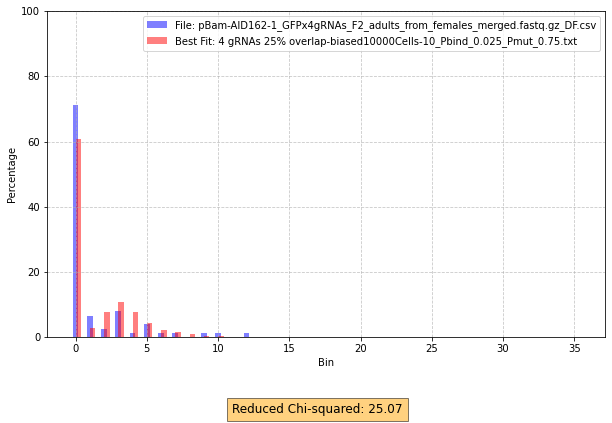

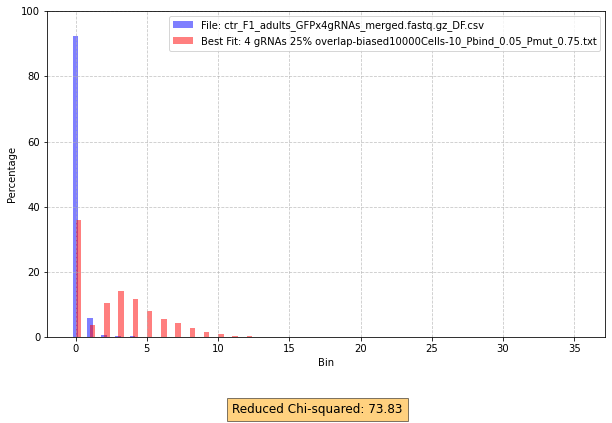

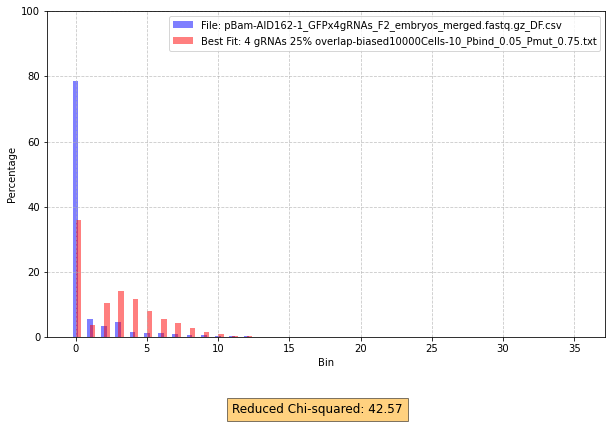

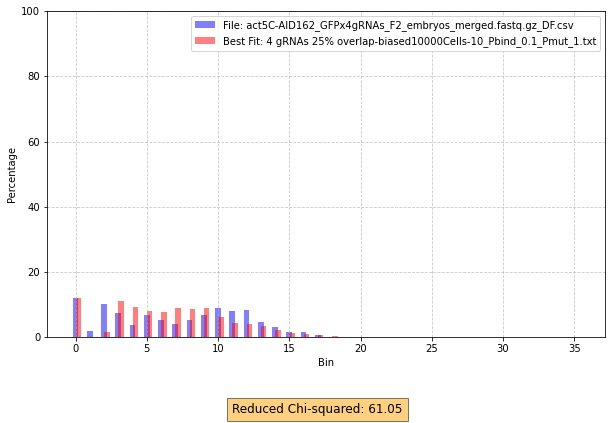

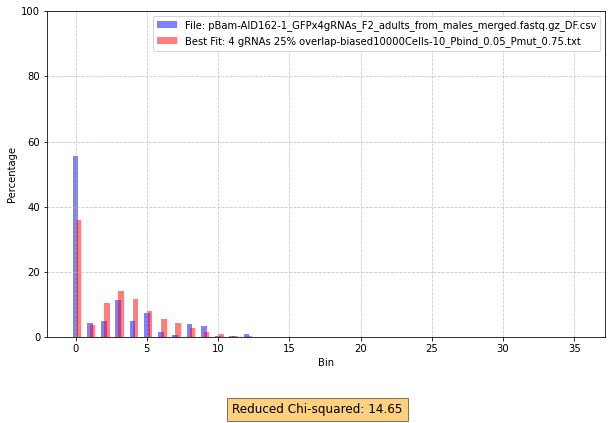

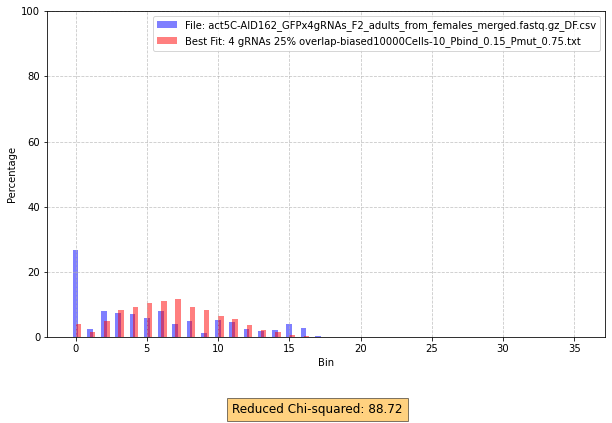

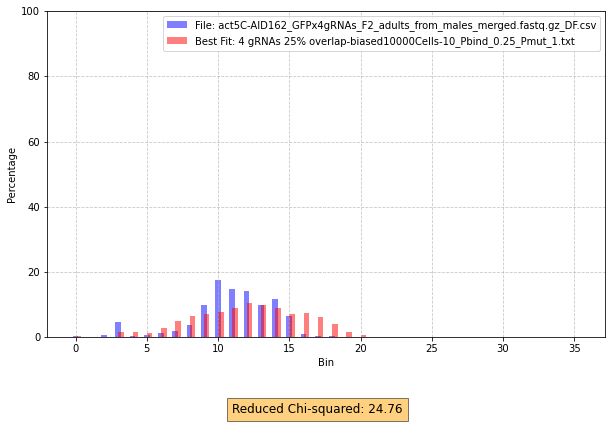

In [9]:
for idx_subset, best_fit_idx in best_fits.items():
    hist_subset = df_histograms_subset.loc[idx_subset].values
    hist_best_fit = df_histograms.loc[best_fit_idx].values

    # Normalize to percentages
    hist_subset_percent = 100 * hist_subset[1:] / hist_subset[1:].sum()  # Skipping the first column (File Name)
    hist_best_fit_percent = 100 * hist_best_fit[1:] / hist_best_fit[1:].sum()  # Skipping the first column (File Name)

    file_name_subset = df_histograms_subset.loc[idx_subset, 'File Name']
    file_name_best_fit = df_histograms.loc[best_fit_idx, 'File Name']
    
    # Calculate chi-squared distance
    chi_squared_red = (chi_squared_distance(hist_subset_percent, hist_best_fit_percent))/2 #reduced chi square = chi squared/ dof

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(hist_subset_percent)), hist_subset_percent, alpha=0.5, label=f'File: {file_name_subset}', color='blue', width=0.4, align='center')
    plt.bar(range(len(hist_best_fit_percent)), hist_best_fit_percent, alpha=0.5, label=f'Best Fit: {file_name_best_fit}', color='red', width=0.4, align='edge')

    plt.xlabel('Bin')
    plt.ylabel('Percentage')
    plt.ylim(0, 100)  # Set y-axis range from 0 to 100
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add chi-squared value to the plot
    plt.figtext(0.5, -0.05, f'Reduced Chi-squared: {chi_squared_red:.2f}', ha='center', fontsize=12, bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5})

    plt.show()


In [10]:
# Note: half of fits are uniform half are biased
# for each file overlay with all biased simulations and include chi squared
# restrict to bias fits 1st and then compare w uniform


## All Fits

In [11]:
print(df_histograms)
# print(df_histograms_subset)

                                            File Name      0      1      2  \
0   4 gRNAs 25% overlap-biased10000Cells-10_Pbind_...    0.0    0.0    0.2   
1   4 gRNAs 25% overlap-biased10000Cells-10_Pbind_...  26.12  38.63  24.67   
2   4 gRNAs 25% overlap-biased10000Cells-10_Pbind_...  60.88   2.83   7.68   
3   4 gRNAs 25% overlap-biased10000Cells-10_Pbind_...  81.34  17.05   1.54   
4   4 gRNAs 25% overlap-biased10000Cells-10_Pbind_...   7.93  22.28  28.37   
..                                                ...    ...    ...    ...   
95  4 gRNAs 25% overlap-biased10000Cells-10_Pbind_...   0.17    1.1    4.7   
96  4 gRNAs 25% overlap-biased10000Cells-10_Pbind_...  43.89  40.22   13.6   
97  4 gRNAs 25% overlap-biased10000Cells-10_Pbind_...    0.0   0.03   1.64   
98  4 gRNAs 25% overlap-biased10000Cells-10_Pbind_...   2.53   9.63  17.71   
99  4 gRNAs 25% overlap-biased10000Cells-10_Pbind_...  21.19   40.0  27.84   

        3      4      5      6      7     8  ...   26   27   28

In [12]:
# extracts Pbind and Pmut values from the filename
def extract_values(filename):
    # Regular expressions to match Pbind and Pmut values
    pbind_match = re.search(r'Pbind_(\d*\.?\d+)', filename)
    pmut_match = re.search(r'Pmut_(\d*\.?\d+)', filename)
    
    # Extract values if matches are found
    pbind = float(pbind_match.group(1)) if pbind_match else None
    pmut = float(pmut_match.group(1)) if pmut_match else None
    
    return pbind, pmut

df_histograms[['Pbind', 'Pmut']] = df_histograms['File Name'].apply(lambda x: pd.Series(extract_values(x)))

In [ ]:
# adding Figure title (df_histograms_subset), mutal legend and caption that includes chi squared, Pmut and Pbind

df_histograms = df_histograms.sort_values(by=['Pmut', 'Pbind'], ascending=[True, True])

save_dir = '/Users/olivia.rourke/Desktop/Berkley/plots_overlay'
num_plots = 100  # Number of plots to generate

for idx_subset, subset_row in df_histograms_subset.iterrows():
    hist_subset_percent = 100 * subset_row[1:] / subset_row[1:].sum()  # Normalize to percentages
    file_name_subset = subset_row['File Name']
    
    # Create a new figure with a grid of subplots
    fig, axs = plt.subplots(10, 10, figsize=(50, 50))  # 10x10 grid for 100 plots
    fig.subplots_adjust(hspace= 0.5, wspace=0.5)  # Adjust space between subplots

    # remove last two colums (pbind, and pmut)
    for i, (idx_hist, hist_row) in enumerate(df_histograms.iterrows()):
        if i >= num_plots:
            break

        hist_hist_percent = 100 * hist_row[1:-2] / hist_row[1:-2].sum()  # Normalize to percentages
        file_name_hist = hist_row['File Name']
        
        # for caption
        pmut_value = hist_row['Pmut']
        pbind_value = hist_row['Pbind']

        # Calculate chi-squared distance
        chi_squared_value = chi_squared_distance(hist_subset_percent, hist_hist_percent)

        # Determine the subplot index
        ax = axs[i // 10, i % 10]

        # Plot histograms on the subplot
        ax.bar(range(len(hist_subset_percent)), hist_subset_percent, alpha=0.5, label='Data', color='blue', width=0.4, align='center')
        ax.bar(range(len(hist_hist_percent)), hist_hist_percent, alpha=0.5, label='Simulation', color='red', width=0.4, align='edge')

        # Plot settings for each subplot
        ax.set_xlabel('Mutable Base')
        ax.set_ylabel('Mutation Rate')
        ax.set_ylim(0, 100)  # Set y-axis range from 0 to 100
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Add chi-squared and Pmut/Pbind annotations
        ax.text(0.5, -0.1, f'Chi-squared: {chi_squared_value:.2f}  Pmut: {pmut_value:.2f}  Pbind: {pbind_value:.2f}', ha='center', va='center', fontsize=8, bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5}, transform=ax.transAxes)
        
       
        
#         ax.text(0.5, -0.1, f'Chi-squared: {chi_squared_value:.2f}', ha='center', va='center', fontsize=8, bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5}, transform=ax.transAxes)
#         ax.text(0.5, -0.2, f'Pmut: {pmut_value:.2f}  Pbind: {pbind_value:.2f}', ha='center', va='center', fontsize=8, bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5}, transform=ax.transAxes)
    
        
#         ax.set_title(f'Plot {i+1}')
#         ax.text(0.5, -0.1, f'Chi-squared: {chi_squared_value:.2f}', ha='center', va='center', fontsize=8, bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5}, transform=ax.transAxes)
#         ax.text(0.5, -0.15, f'Pmut {df_histograms.Pmut:.2f} Pbind {df_histograms.Pbind: .2f}', ha='center', va='center', fontsize=8, bbox={"facecolor": "orange", "alpha": 0.5, "pad": 5}, transform=ax.transAxes)
    
    fig.tight_layout()
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=2, labelspacing=0.5)
    
    # Add a title to the figure
    fig.suptitle(f'{file_name_subset}', fontsize=20)

    # Save the figure with all subplots
    plot_filename = f'{file_name_subset}_all_plots.png'
    full_path = os.path.join(save_dir, plot_filename)
    plt.savefig(full_path, bbox_inches='tight')
    plt.close()  # Close the figure to avoid memory issues

    print(f'Generated plots for {file_name_subset}')


Generated plots for pBam-AID162-1_GFPx4gRNAs_F2_adults_from_females_merged.fastq.gz_DF.csv


## Heatmap (have to fix) 

In [ ]:
# Sort df_histograms by Pmut and Pbind
df_histograms_sorted = df_histograms.sort_values(by=['Pmut', 'Pbind'], ascending=[True, True])

for idx_subset, subset_row in df_histograms_subset.iterrows():
    
    hist_subset_percent = 100 * subset_row[1:] / subset_row[1:].sum()  # Normalize to percentages
    file_name_subset = subset_row['File Name']

    # Initialize a matrix to store chi-squared values
    chi_squared_matrix = np.zeros((10, 10))

    for i, (idx_hist, hist_row) in enumerate(df_histograms_sorted.iterrows()):
        if i >= num_plots:
            break

        hist_hist_percent = 100 * hist_row[1:-2] / hist_row[1:-2].sum()  # Normalize to percentages
        file_name_hist = hist_row['File Name']

        # Calculate chi-squared distance
        chi_squared_value = chi_squared_distance(hist_subset_percent, hist_hist_percent)

        # Store chi-squared value in the matrix
        chi_squared_matrix[i // 10, i % 10] = chi_squared_value
        

    # Generate and save heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(chi_squared_matrix)
    plt.title(f'Chi-squared Heatmap for {file_name_subset}')
